In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time

#Размер файла ~ 700 мб
try:
    data1 = pd.read_csv(r"C:\Users\Ivan\Documents\Pet projects Ivan\Tableau\New York yellow taxi riges 2018\yellow_tripdata_2019-01.csv") 
except: 
    data1 = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv')



Wall time: 19.9 s


In [3]:
%%time

#Размер файла ~ 700 мб
try:
    data2 = pd.read_csv(r"C:\Users\Ivan\Documents\Pet projects Ivan\Tableau\New York yellow taxi riges 2018\yellow_tripdata_2019-02.csv") 
except: 
    data2 = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-02.csv')

Wall time: 23.4 s


In [4]:
%%time

#Размер файла ~ 700 мб
try:
    data3 = pd.read_csv(r"C:\Users\Ivan\Documents\Pet projects Ivan\Tableau\New York yellow taxi riges 2018\yellow_tripdata_2019-03.csv") 
except: 
    data3 = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-03.csv')

Wall time: 38.2 s


In [5]:
%%time

try:
    taxi_loc = pd.read_csv(r"C:\Users\Ivan\Documents\Pet projects Ivan\Tableau\New York yellow taxi riges 2018\taxi+_zone_lookup.csv"
                      , sep = '""')
except: 
    taxi_loc = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv', sep = '""')

taxi_loc

Wall time: 129 ms


,"""LocationID,",Borough,",",Zone,",.1",service_zone,""""
0,"""1,",EWR,",",Newark Airport,",",EWR,""""
1,"""2,",Queens,",",Jamaica Bay,",",Boro Zone,""""
2,"""3,",Bronx,",",Allerton/Pelham Gardens,",",Boro Zone,""""
3,"""4,",Manhattan,",",Alphabet City,",",Yellow Zone,""""
4,"""5,",Staten Island,",",Arden Heights,",",Boro Zone,""""
...,...,...,...,...,...,...,...
260,"""261,",Manhattan,",",World Trade Center,",",Yellow Zone,""""
261,"""262,",Manhattan,",",Yorkville East,",",Yellow Zone,""""
262,"""263,",Manhattan,",",Yorkville West,",",Yellow Zone,""""
263,"""264,",Unknown,",",NV,",",NaN,""""


In [6]:
taxi_loc.columns = map(str.lower, taxi_loc.columns)
taxi_loc

,"""locationid,",borough,",",zone,",.1",service_zone,""""
0,"""1,",EWR,",",Newark Airport,",",EWR,""""
1,"""2,",Queens,",",Jamaica Bay,",",Boro Zone,""""
2,"""3,",Bronx,",",Allerton/Pelham Gardens,",",Boro Zone,""""
3,"""4,",Manhattan,",",Alphabet City,",",Yellow Zone,""""
4,"""5,",Staten Island,",",Arden Heights,",",Boro Zone,""""
...,...,...,...,...,...,...,...
260,"""261,",Manhattan,",",World Trade Center,",",Yellow Zone,""""
261,"""262,",Manhattan,",",Yorkville East,",",Yellow Zone,""""
262,"""263,",Manhattan,",",Yorkville West,",",Yellow Zone,""""
263,"""264,",Unknown,",",NV,",",NaN,""""


In [7]:
taxi_loc

,"""locationid,",borough,",",zone,",.1",service_zone,""""
0,"""1,",EWR,",",Newark Airport,",",EWR,""""
1,"""2,",Queens,",",Jamaica Bay,",",Boro Zone,""""
2,"""3,",Bronx,",",Allerton/Pelham Gardens,",",Boro Zone,""""
3,"""4,",Manhattan,",",Alphabet City,",",Yellow Zone,""""
4,"""5,",Staten Island,",",Arden Heights,",",Boro Zone,""""
...,...,...,...,...,...,...,...
260,"""261,",Manhattan,",",World Trade Center,",",Yellow Zone,""""
261,"""262,",Manhattan,",",Yorkville East,",",Yellow Zone,""""
262,"""263,",Manhattan,",",Yorkville West,",",Yellow Zone,""""
263,"""264,",Unknown,",",NV,",",NaN,""""


In [8]:
taxi_loc.drop([',', ',.1', '"'], axis=1, inplace=True)

In [9]:
taxi_loc.rename(columns={'"locationid,': 'location_id' }, inplace=True)

In [10]:
taxi_loc['location_id'] = taxi_loc['location_id'].apply(lambda x: x.replace('"', '')).apply(lambda x: x.replace(',', ''))

In [11]:
taxi_loc.service_zone.unique()

array(['EWR', 'Boro Zone', 'Yellow Zone', 'Airports', nan], dtype=object)

In [12]:
#taxi_loc.to_csv('taxi_loc.csv')

In [13]:
%%time
big_data = pd.concat([data1, data2, data3], ignore_index=True)


Wall time: 27.3 s


In [14]:
cleared_data = big_data.drop(['VendorID', 'RatecodeID', 'store_and_fwd_flag',
                              'improvement_surcharge', 'congestion_surcharge',
                             'extra', 'mta_tax','tolls_amount','fare_amount'], axis=1)
cleared_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,tip_amount,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,151,239,1,1.65,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,239,246,1,1.00,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,236,236,1,0.00,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,193,193,2,0.00,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,193,193,2,0.00,55.55


In [15]:
cleared_data.rename(columns={'tpep_pickup_datetime': 'pickup_datetime',
                            'tpep_dropoff_datetime':'dropoff_datetime',
                            'passenger_count':'pass_count',
                            'trip_distance':'trip_dist',
                            'PULocationID':'pickup_loc_id',
                            'DOLocationID':'dropoff_loc_id'}, inplace=True)
cleared_data.head()

,pickup_datetime,dropoff_datetime,pass_count,trip_dist,pickup_loc_id,dropoff_loc_id,payment_type,tip_amount,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,151,239,1,1.65,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,239,246,1,1.00,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,236,236,1,0.00,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,193,193,2,0.00,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,193,193,2,0.00,55.55


In [16]:
cleared_data['pickup_datetime'] = pd.to_datetime(cleared_data['pickup_datetime'])

In [17]:
cleared_data['dropoff_datetime'] = pd.to_datetime(cleared_data['dropoff_datetime'])

In [18]:
cleared_data['time_ride']  = cleared_data['dropoff_datetime'] - cleared_data['pickup_datetime']
cleared_data.head()

,pickup_datetime,dropoff_datetime,pass_count,trip_dist,pickup_loc_id,dropoff_loc_id,payment_type,tip_amount,total_amount,time_ride
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,151,239,1,1.65,9.95,0 days 00:06:40
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,239,246,1,1.00,16.30,0 days 00:19:12
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,236,236,1,0.00,5.80,0 days 00:04:10
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,193,193,2,0.00,7.55,0 days 00:03:20
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,193,193,2,0.00,55.55,0 days 00:01:36


In [19]:
cleared_data['time_ride_minutes']  = round(cleared_data['time_ride'].dt.total_seconds()/60, 2)

In [20]:
cleared_data = cleared_data.query('time_ride_minutes > 0') #удалить отрицательные и нулевые значения

In [21]:
cleared_data_120 = cleared_data.query('time_ride_minutes < 120') #удалим значения, где время поездки больще 2 часов

In [22]:
cleared_data_120['revenue'] = cleared_data_120['total_amount'] - cleared_data_120['tip_amount']
cleared_data_120.head()

,pickup_datetime,dropoff_datetime,pass_count,trip_dist,pickup_loc_id,dropoff_loc_id,payment_type,tip_amount,total_amount,time_ride,time_ride_minutes,revenue
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,151,239,1,1.65,9.95,0 days 00:06:40,6.67,8.30
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,239,246,1,1.00,16.30,0 days 00:19:12,19.20,15.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,236,236,1,0.00,5.80,0 days 00:04:10,4.17,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,193,193,2,0.00,7.55,0 days 00:03:20,3.33,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,193,193,2,0.00,55.55,0 days 00:01:36,1.60,55.55


In [23]:
cleared_data_120['commision_8'] = cleared_data_120['revenue'] * 0.08


In [24]:
cleared_data_120['pickup_just_date'] = cleared_data_120['pickup_datetime'].dt.date

In [25]:
cleared_data_120['pickup_just_date'] = cleared_data_120['pickup_datetime'].dt.date

In [26]:
cleared_data_120.shape

(22439599, 14)

In [37]:
cleared_data_120_2019Q1 = cleared_data_120.query('pickup_datetime > "2019-01-01" and pickup_datetime < "2019-04-01"')

In [46]:
taxi_prep_data_15kk = cleared_data_120_2019Q1.sample(15*10**6)
taxi_prep_data_15kk.shape

(15000000, 14)

In [47]:
%%time
taxi_prep_data_15kk.to_csv('taxi_prep_data_15kk.csv')

Wall time: 9min 27s


# Делаем тестовую test_data на 10000 строк

Для дальнейшего тестирования работы в Tableau и после уже загрузить на 22 млн строк

In [39]:
test_data = cleared_data_120.sample(10000)

In [40]:
taxi_zone = taxi_loc[['location_id', 'zone']]

In [41]:
taxi_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  265 non-null    object
 1   zone         264 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [42]:
taxi_zone = taxi_zone[taxi_zone['zone'].notna()]


In [43]:
taxi_zone.location_id = taxi_zone.location_id.astype('int64')

In [44]:
test_data_taxi = test_data.merge(taxi_zone, how='left', left_on='pickup_loc_id', right_on='location_id') 
test_data_taxi
#соединяем по локации пикап

,pickup_datetime,dropoff_datetime,pass_count,trip_dist,pickup_loc_id,dropoff_loc_id,payment_type,tip_amount,total_amount,time_ride,time_ride_minutes,revenue,commision_8,pickup_just_date,location_id,zone
0,2019-03-08 15:01:53,2019-03-08 15:10:27,2,0.73,161,230,1,1.96,11.76,0 days 00:08:34,8.57,9.80,0.7840,2019-03-08,161.0,Midtown Center
1,2019-03-08 17:40:07,2019-03-08 17:54:19,1,0.80,142,239,1,2.15,16.45,0 days 00:14:12,14.20,14.30,1.1440,2019-03-08,142.0,Lincoln Square East
2,2019-03-15 09:28:12,2019-03-15 09:34:24,1,0.82,142,143,1,1.86,11.16,0 days 00:06:12,6.20,9.30,0.7440,2019-03-15,142.0,Lincoln Square East
3,2019-01-24 17:52:32,2019-01-24 17:56:19,1,0.55,230,163,2,0.00,6.30,0 days 00:03:47,3.78,6.30,0.5040,2019-01-24,230.0,Times Sq/Theatre District
4,2019-03-28 14:08:47,2019-03-28 14:18:39,2,0.70,161,100,1,2.00,12.80,0 days 00:09:52,9.87,10.80,0.8640,2019-03-28,161.0,Midtown Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-02-08 08:29:24,2019-02-08 08:58:29,5,3.26,75,170,1,1.00,22.80,0 days 00:29:05,29.08,21.80,1.7440,2019-02-08,75.0,East Harlem South
9996,2019-01-31 21:04:16,2019-01-31 21:33:23,1,5.70,107,49,1,0.00,24.80,0 days 00:29:07,29.12,24.80,1.9840,2019-01-31,107.0,Gramercy
9997,2019-01-24 13:20:40,2019-01-24 13:33:57,1,5.85,134,132,1,11.71,70.27,0 days 00:13:17,13.28,58.56,4.6848,2019-01-24,134.0,Kew Gardens
9998,2019-03-11 22:06:22,2019-03-11 22:19:36,4,2.43,239,237,1,3.06,18.36,0 days 00:13:14,13.23,15.30,1.2240,2019-03-11,239.0,Upper West Side South


In [45]:
test_data_taxi = test_data_taxi.merge(taxi_zone, how='left', left_on='dropoff_loc_id', right_on='location_id') 
test_data_taxi
#соединяем по локации дропоф

,pickup_datetime,dropoff_datetime,pass_count,trip_dist,pickup_loc_id,dropoff_loc_id,payment_type,tip_amount,total_amount,time_ride,time_ride_minutes,revenue,commision_8,pickup_just_date,location_id_x,zone_x,location_id_y,zone_y
0,2019-03-08 15:01:53,2019-03-08 15:10:27,2,0.73,161,230,1,1.96,11.76,0 days 00:08:34,8.57,9.80,0.7840,2019-03-08,161.0,Midtown Center,230.0,Times Sq/Theatre District
1,2019-03-08 17:40:07,2019-03-08 17:54:19,1,0.80,142,239,1,2.15,16.45,0 days 00:14:12,14.20,14.30,1.1440,2019-03-08,142.0,Lincoln Square East,239.0,Upper West Side South
2,2019-03-15 09:28:12,2019-03-15 09:34:24,1,0.82,142,143,1,1.86,11.16,0 days 00:06:12,6.20,9.30,0.7440,2019-03-15,142.0,Lincoln Square East,143.0,Lincoln Square West
3,2019-01-24 17:52:32,2019-01-24 17:56:19,1,0.55,230,163,2,0.00,6.30,0 days 00:03:47,3.78,6.30,0.5040,2019-01-24,230.0,Times Sq/Theatre District,163.0,Midtown North
4,2019-03-28 14:08:47,2019-03-28 14:18:39,2,0.70,161,100,1,2.00,12.80,0 days 00:09:52,9.87,10.80,0.8640,2019-03-28,161.0,Midtown Center,100.0,Garment District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-02-08 08:29:24,2019-02-08 08:58:29,5,3.26,75,170,1,1.00,22.80,0 days 00:29:05,29.08,21.80,1.7440,2019-02-08,75.0,East Harlem South,170.0,Murray Hill
9996,2019-01-31 21:04:16,2019-01-31 21:33:23,1,5.70,107,49,1,0.00,24.80,0 days 00:29:07,29.12,24.80,1.9840,2019-01-31,107.0,Gramercy,49.0,Clinton Hill
9997,2019-01-24 13:20:40,2019-01-24 13:33:57,1,5.85,134,132,1,11.71,70.27,0 days 00:13:17,13.28,58.56,4.6848,2019-01-24,134.0,Kew Gardens,132.0,JFK Airport
9998,2019-03-11 22:06:22,2019-03-11 22:19:36,4,2.43,239,237,1,3.06,18.36,0 days 00:13:14,13.23,15.30,1.2240,2019-03-11,239.0,Upper West Side South,237.0,Upper East Side South


In [46]:
#test_data_taxi.to_csv('test_data_taxi_10k.csv')

1. Количество поездок по дням
2. Дистанция по дням
3. Сумма выручки по дням без учета чаевых
4. Комиссия, если бы это был inDriver
4. Самые попуряные поездки по дням/месяцам
5. Среднее время поездки

## 1. Количество поездок по дням

<AxesSubplot:xlabel='pickup_just_date'>

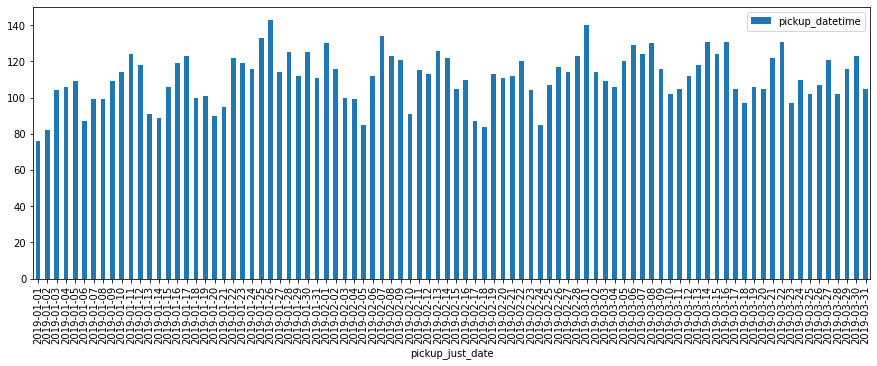

In [77]:
test_data_taxi.pivot_table(
               index=["pickup_just_date"],
               values=["pickup_datetime"],
               aggfunc='count').plot(kind="bar", figsize=(15, 5))

In [96]:
test_data_taxi.pivot_table(
               index=["pickup_just_date"],
               values=["pickup_datetime"],
               aggfunc='count')

,pickup_datetime
pickup_just_date,
2019-01-01,76
2019-01-02,82
2019-01-03,104
2019-01-04,106
2019-01-05,109
...,...
2019-03-27,121
2019-03-28,102
2019-03-29,116


<AxesSubplot:xlabel='pickup_just_date', ylabel='pickup_datetime'>

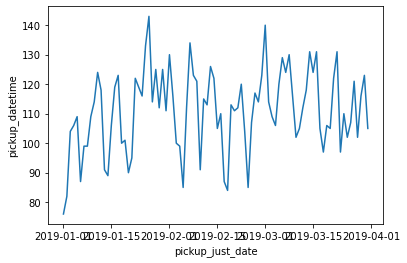

In [99]:
sns.lineplot(data=test_data_taxi.pivot_table(
               index=["pickup_just_date"],
               values=["pickup_datetime"],
               aggfunc='count'), x="pickup_just_date", y="pickup_datetime")

## 2. Cредняя поездка по дням

<AxesSubplot:xlabel='pickup_just_date'>

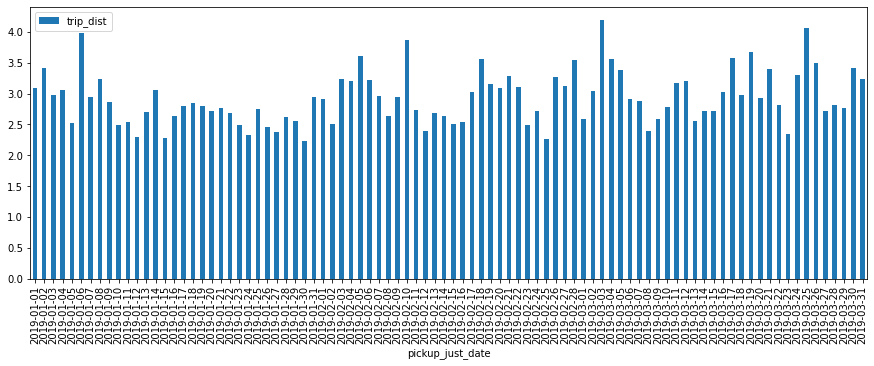

In [59]:
test_data_taxi.pivot_table(
               index=["pickup_just_date"],
               values=["trip_dist"],
               aggfunc='mean').plot(kind="bar", figsize=(15, 5))

<AxesSubplot:xlabel='pickup_just_date', ylabel='trip_dist'>

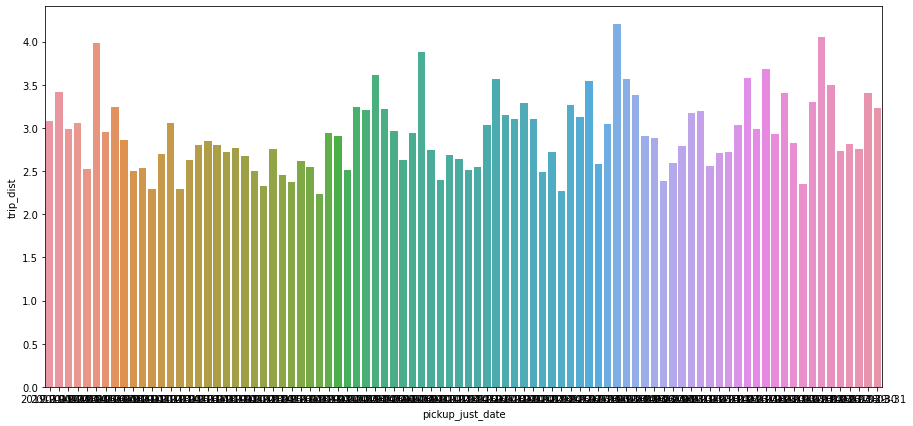

In [61]:
plt.rcParams['figure.figsize'] = (15,7)

sns.barplot(data=test_data_taxi.pivot_table(
               index=["pickup_just_date"],
               values=["trip_dist"],
               aggfunc='mean').reset_index(), x="pickup_just_date", y="trip_dist")

## 3. Сумма выручки по дням без учета чаевых

<AxesSubplot:xlabel='pickup_just_date'>

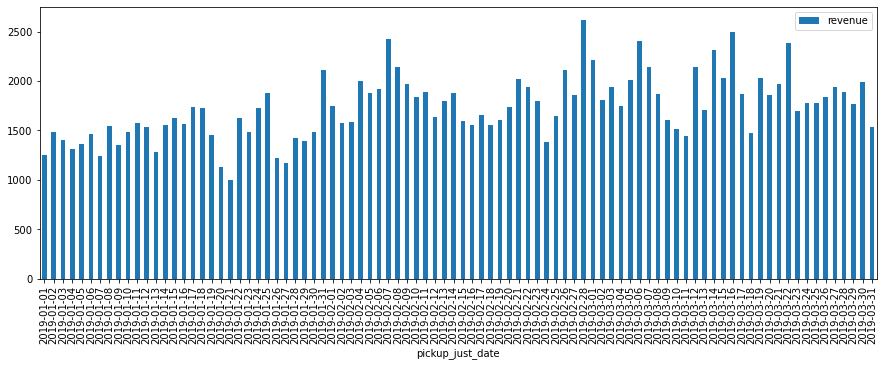

In [53]:
test_data_taxi.pivot_table(
               index=["pickup_just_date"],
               values=["revenue"],
               aggfunc='sum').plot(kind="bar", figsize=(15, 5))

## 4. Комиссия, если бы это был inDriver

<AxesSubplot:xlabel='pickup_just_date'>

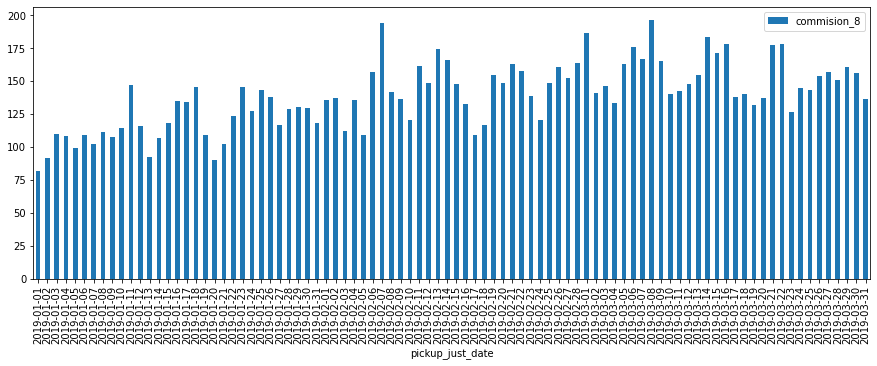

In [81]:
test_data_taxi.pivot_table(
               index=["pickup_just_date"],
               values=["commision_8"],
               aggfunc='sum').plot(kind="bar", figsize=(15, 5))

## 5. Самые попуряные поездки по дням/месяцам


<AxesSubplot:>

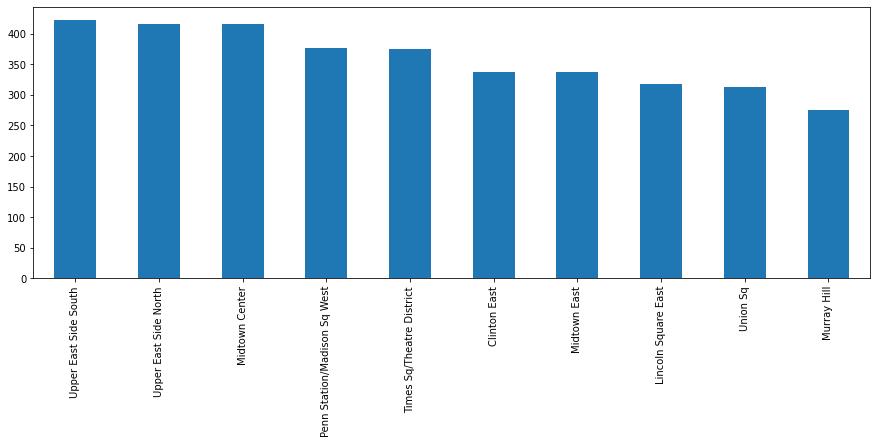

In [56]:
#откуда чаще ездят
test_data_taxi.zone_x.value_counts().head(10).plot(kind="bar", figsize=(15, 5))


<AxesSubplot:>

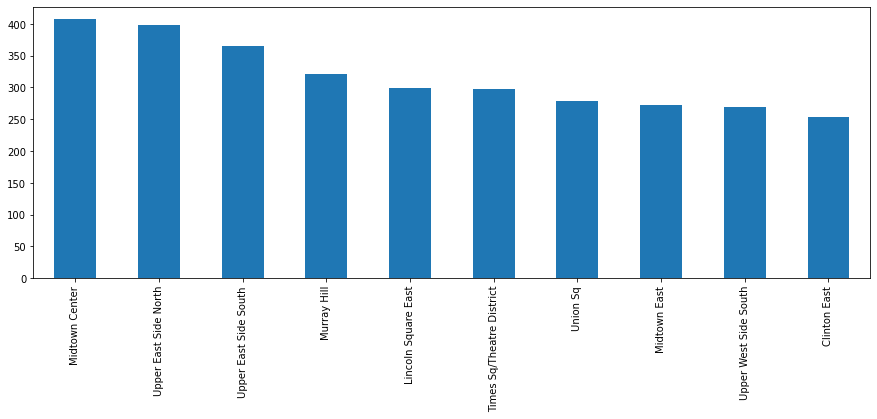

In [57]:
#куда чаще ездят
test_data_taxi.zone_y.value_counts().head(10).plot(kind="bar", figsize=(15, 5))